# Esercitazione 10

In [14]:
#Librerie necessarie

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

## Introduzione

Le cartelle contengono i codici utilizzati per la risoluzione degli esercizi e i risultati di ciascun calcolo. Essi verranno analizzati all'interno del notebook, per un controllo del corretto funzionamento del codice è sufficente compilare utilizzando il comando "make run" all'interno della cartella dell'esercitazione corrispondente per ottenere nuovi risultati di output.

## Es 10.1


Il problema che viene affrontato in questa esercitazione e il medesimo della precedente (si rimanda quindi al notebook 9 per il dettaglio della descrizione del problema e dei metodi implementati).

L'obiettivo è quello di ottenere un confronto tra l'algoritmo genetico (GA) implementato precedentemente con un altro tipo di algoritmo metaeuristico, il Simulated Annealing (SA) , oggetto di questo notebook. L'algoritmo che è stato implementato presenta lo stesso scheletro del GA ma è diverso da esso poichè le possibili nuove configurazioni non vengono ottenute tramite crossover dei genitori ma sono le mosse proposte dall'algoritmo di Metropolis il quale le genera effettuando un certo numero di mutazioni (impostato esternamente) a partire dalle generazione precedente. La nuova configurazione viene accettata con probabilità $P$:

$$
P = 
\begin{cases}
  1 \quad se \quad L^{(2)}({x'}) < L^{(2)}({x})\\
  e^{-\beta \left(L^{(2)}({x'}) -L^{(2)}({x})\right)} \quad se \quad L^{(2)}({x'}) > L^{(2)}({x})
\end{cases}
$$
dove le variabili primate indicano le nuove configurazioni e

$$
L^{(2)}({x}) = L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2 \, 
$$
Il Metropolis viene eseguito con un numero di passi $N_{M} = 1000$ fissato al variare di $\beta \in [0,80]$. La mutazione avviene ad ogni passo del metropolis quindi con probabilita 1, in modo tale che venga sempre proposta una nuova configuraione; la mutazione che si effettua viene scelta in maniera random tra tutte quelle implementate. La simulazione è stata effettuata prendendo in considerazione un solo genitore per effettuare in seguito un confronto con il codice analogo scritto per la programmazione parallela.

Nella seguente tabella si riportano i parametri utilizzati durante nella simulazione.


| Disposizione città | Numero città | Range di $\beta$ | Incremento $\beta$ | Numero di campionamenti $N_{M}$	| Numero di mutazioni | Numero di genitori|
| ----------|----------|----------|---------|----------|------------|---------|
|Circonferenza| 	32|	$[0,80]$|	0.0005	|1000	|2	|1	|
|Quadrato	| 32	|$[0,80]$	| 0.0005	|1000	|2	|1	|

Sono riportati di seguito i grafici della minima distanza quadratica $L^{(2)}$ in funzione $\beta$ e del miglior percorso all'ultima generazione.

Si nota che le distanze più brevi ottenute sono simili a quelle del GA; nel dettaglio nel caso delle città disposte lungo la circonferenza di raggio unitario il GA ha ottenuto un risultato migliore $(2.95372)$ rispetto al SA $(2.9938)$ e la situazione è analoga nel caso delle città disposte all'interno di un quadrato di lato unitario poichè il risultato ottenuto con il GA $(0.963356)$ è migliore di quello ottenuto attraverso il SA $(0.9677)$. In conclusione, si può affermare che entrambi gli algoritmi hanno permesso di raggiungere efficacemente le vicinanze del ground state.

Distanza minima quadratica percorsa dal venditore sulla circonferenza:  3.2156


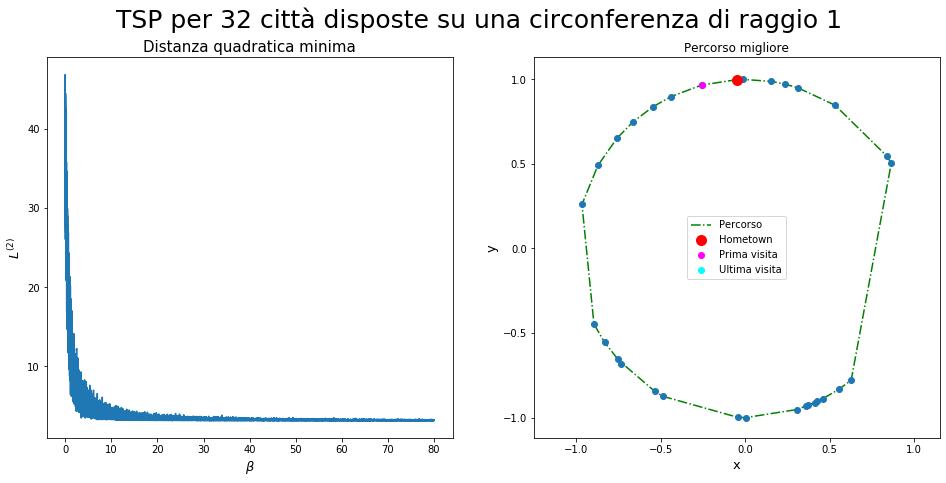

In [15]:
plt.figure(figsize=(16,7))
plt.suptitle('TSP per 32 città disposte su una circonferenza di raggio 1',fontsize=25) 

plt.subplot(1,2,1)
L = np.loadtxt("10/distance_circle.out", usecols=(0), unpack='true')
beta = np.linspace(0,80,len(L))
plt.plot(beta,L)
plt.title('Distanza quadratica minima',fontsize=15)
plt.xlabel(r"$\beta$", fontsize = 13)
plt.ylabel(r"$L^{(2)}$", fontsize = 13)
print('Distanza minima quadratica percorsa dal venditore sulla circonferenza: ', L[len(L)-1])


plt.subplot(1,2,2)
x,y = np.loadtxt("10/path_circle.out", usecols=(0,1), unpack='true')
plt.plot(x,y,zorder=1,label = 'Percorso',linestyle = '-.',color='green') 
plt.scatter(x,y,zorder=2)
plt.scatter(x[0],y[0],s=100,label ='Hometown',color = 'red', zorder = 7)
plt.scatter(x[1],y[1],label ='Prima visita',color = 'Magenta',zorder = 3)
plt.scatter(x[len(x)-2],y[len(y)-2],label ='Ultima visita',color = 'cyan',zorder = 3)
plt.title('Percorso migliore')
plt.axis("equal")
plt.xlabel("x", fontsize = 13)
plt.ylabel("y", fontsize = 13)
plt.legend()
plt.show()

Distanza minima quadratica percorsa dal venditore nel quadrato:  0.96684


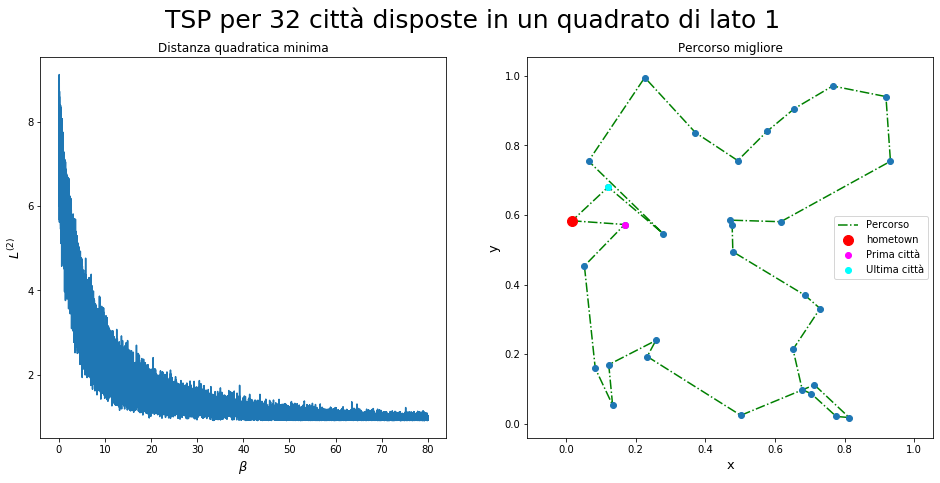

In [12]:
plt.figure(figsize=(16,7))
plt.suptitle('TSP per 32 città disposte in un quadrato di lato 1',fontsize=25) 

plt.subplot(1,2,1)
L = np.loadtxt("10/distance_square.out", usecols=(0), unpack='true')
beta = np.linspace(0,80,len(L))
plt.plot(beta,L)
plt.title('Distanza quadratica minima')
plt.xlabel(r"$\beta$", fontsize = 13)
plt.ylabel(r"$L^{(2)}$", fontsize = 13)
print('Distanza minima quadratica percorsa dal venditore nel quadrato: ', L[len(L)-1])


plt.subplot(1,2,2)
x,y = np.loadtxt("10/path_square.out", usecols=(0,1), unpack='true')
plt.plot(x,y,zorder=1,label = 'Percorso',linestyle = '-.', color = 'green') 
plt.scatter(x,y,zorder=2)
plt.scatter(x[0],y[0],s=100,label ='hometown',color = 'red', zorder = 7)
plt.scatter(x[1],y[1],label ='Prima città',color = 'Magenta',zorder = 3)
plt.scatter(x[len(x)-2],y[len(y)-2],label ='Ultima città',color = 'cyan',zorder = 3)
plt.title('Percorso migliore')
plt.axis("equal")
plt.xlabel("x", fontsize = 13)
plt.ylabel("y", fontsize = 13)
plt.legend()
plt.show()

## Es 10.2

Questa parte dell'esercitazione consiste nel parallelizzare l'algoritmo precedentemente implementato in modo tale da poterlo fare eseguire da tutti i core in parallelo disponibili sulla macchina.

Rispetto al caso precedente questa procedura permette di guadagnare sia dal punto di vista di tempo computazionale sia per quanto riguarda l'ergodicità dell'algoritmo poichè ogni nodo che viene utilizzato, a parità delle posizioni delle città, possiede una diversa configurazione iniziale. Questa configurazione di input è stata resa possibile effettuando degli shuffle della configurazione standard $[0,1,....,31]$ a partire da seed diversi per ogni nodo. La simulazione procede in maniera analoga per tutti i nodi ognuno dei quali individua la distanza minima ottenuta e il rispettivo miglior cammino. Successivamente queste informazioni sono trasferite ad un singolo nodo che si occupa del confronto tra i risulati per ricavare in ultima analisi la miglior distanza tra quelle ottenute e il migliore dei percorsi.

Nella seguente tabella sono riportati i parametri utilizzati per questa simulazione. Questi ultimi sono stati scelti in modo tale che il "peso computazionale" fosse il più simile possibile ad quello del punto precedente per effettuare un confronto tra i tempi.

|Disposizione città |Numero città	|Range di $\beta$	|Incremento $\beta$	|Numero di campionamenti per nodo	|Numero di mutazioni	|Numero di genitori	|Numero di nodi|
|----------|--------|------------|-------------|------------|-------------|-------------|----------|
|Circonferenza	|32	|$[0,80]$	|0.0005	|250	|3	|1	|4	|
|Quadrato	|32	|$[0,80]$	|0.0005	|250	|3	|1	|4 |	

Confrontando i tempi di esecuzione del codice in parallelo o quello seriale si è ottenuto un fattore di guadagno temporale di $\simeq 2-2,5$ a secondo del tipo di mutazione utilizzata.

Sono riportati di seguito i valori minori di $L^{(2)}$ e la rappresentazione grafica del miglior cammino per entrambe le disposizioni delle citta considerate.

Distanza minima percorsa dal commesso viaggiatore sulla circonferenza di raggio 1:  3.2156
Distanza minima percorsa dal commesso viaggiatore nel quadrato di lato 1:  0.96684


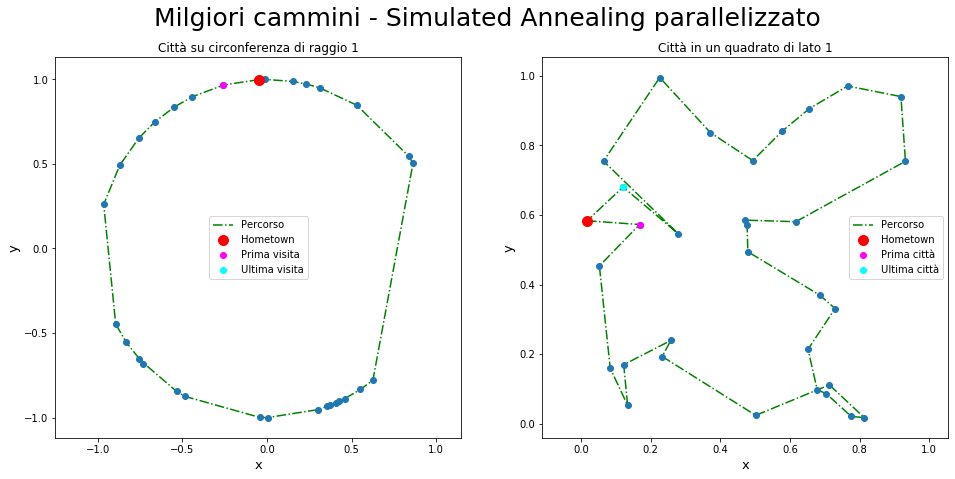

In [17]:
x1,y1 = np.loadtxt("10/distanceAndpath_circle.out", usecols=(0,1), unpack='true')
x,y = np.loadtxt("10/distanceAndpath_square.out", usecols=(0,1), unpack='true')
print('Distanza minima percorsa dal commesso viaggiatore sulla circonferenza di raggio 1: ',x1[0])
print('Distanza minima percorsa dal commesso viaggiatore nel quadrato di lato 1: ',x[0])


plt.figure(figsize=(16,7))
plt.suptitle('Milgiori cammini - Simulated Annealing parallelizzato',fontsize=25) 
plt.subplot(1,2,1)
x1 = x1[1:len(x1)]
y1 = y1[1:len(y1)]
plt.plot(x1,y1,zorder=1,label = 'Percorso',linestyle = '-.', color = 'green') 
plt.scatter(x1,y1,zorder=2)
plt.scatter(x1[0],y1[0],s=100,label ='Hometown',color = 'red', zorder = 7)
plt.scatter(x1[1],y1[1],label ='Prima visita',color = 'Magenta',zorder = 3)
plt.scatter(x1[len(x1)-2],y1[len(y1)-2],label ='Ultima visita',color = 'cyan',zorder = 3)
plt.title('Città su circonferenza di raggio 1')
plt.axis("equal")
plt.xlabel("x", fontsize = 13)
plt.ylabel("y", fontsize = 13)
plt.legend()

plt.subplot(1,2,2)
x = x[1:len(x)]
y = y[1:len(y)]
plt.plot(x,y,zorder=1,label = 'Percorso',linestyle = '-.', color = 'green') 
plt.scatter(x,y,zorder=2)
plt.scatter(x[0],y[0],s=100,label ='Hometown',color = 'red', zorder = 7)
plt.scatter(x[1],y[1],label ='Prima città',color = 'Magenta',zorder = 3)
plt.scatter(x[len(x)-2],y[len(y)-2],label ='Ultima città',color = 'cyan',zorder = 3)
plt.title('Città in un quadrato di lato 1')
plt.axis("equal")
plt.xlabel("x", fontsize = 13)
plt.ylabel("y", fontsize = 13)
plt.legend()
plt.show()

In conclusione si può notare che oltre al notevole guadagno in termini di tempo, la parallelizzazione ha permesso di ottenere un risultato migliore del SA svolto su un unico nodo. Inoltre si osserva che i risultati ottenuti sono invece compatibili a quelli ottenuti attraverso l'algoritmo genetico.